# Dot Product

``` 
Let's say we want to buy grocery and this is the amount we would like to buy:   

Apple     : 3   
Watermelon: 1   
Avacado   : 3   
Lemon     : 5   

Here are the prices:

Apple     : $2 each  
Watermelon: $4 each      
Avacado   : $1.5 each    
Lemon     : $0.25 each    
    
   
How much should we pay?   

Apple     :  3 * $2   = $6   
Watermelon:  1 * $4   = $4   
Avacado   :  3 * $1.5 = $4.5   
Lemon     :  5 * $.25 = $1.25   
                      +   
                      ________   
               Total  = $15.75   

How can we calculate it in Python?

```

In [1]:
#Data First:
amounts = {  'Apple'     : 3   
            ,'Watermelon': 1   
            ,'Avacado'   : 3   
            ,'Lemon'     : 5 }
print("Amounts: ")
print(amounts)
prices = {   'Apple'     : 2   
            ,'Watermelon': 4   
            ,'Avacado'   : 1.5   
            ,'Lemon'     : .25 }
print("Prices: ")
print(prices)

Amounts: 
{'Apple': 3, 'Watermelon': 1, 'Avacado': 3, 'Lemon': 5}
Prices: 
{'Apple': 2, 'Watermelon': 4, 'Avacado': 1.5, 'Lemon': 0.25}


In [2]:
#Convert to list for calculation
amounts_list = list(amounts.values())
prices_list  = list(prices.values())

In [3]:
# With loop
totals = []
for a, p in zip(amounts_list,prices_list):
    totals.append(a*p)
sum(totals)

15.75

In [4]:
# With list comprehension
sum([a*p for a, p in zip(amounts_list,prices_list)])

15.75

```
In loops, the process goes like this:

loop 1 —> 3 * 2      —> list = [6]
loop 2 —> 1 * 4      —> list = [6, 4]
loop 3 —> 3 * 1.5    —> list = [6, 4, 4.5]
loop 4 —> 5 * .25    —> list = [6, 4, 4.5, 1.25]
finally ...             sum  = (6 + 4 + 4.5 + 1.25)
                        sum  = 15.75
```

In [5]:
# Dot product

```

In dot product, the process goes like this (all calculations at once):

(1 x 4 matrix) *  (4 x 1 matrix) = 1 x 1 matrix (or a single value)
__________________________________________________________________________

|3, 1, 3, 5|   *    |  2  |      = |(3*2)+(1*4)+(3*1.5)+(5*.25)| = |15.75|
                    |  4  | 
                    | 1.5 |
                    | .25 |

```

In [6]:
# With numpy
import numpy as np
# First convert to array
amounts_array = np.array(amounts_list)
prices_array = np.array(prices_list)

# Then the rest is easy!

np.dot(amounts_array,prices_array)

15.75

# Let's stress test and time

In [7]:
import random
random.seed(0)

amounts_list = [random.randint(1,10) for i in range(1000000)]
prices_list  = [random.randint(1,5)  for i in range(1000000)]

In [8]:
import time
start_time = time.time()
# With loop
totals = []
for a, p in zip(amounts_list,prices_list):
    totals.append(a*p)
sum(totals)
timeloop = time.time()-start_time
print(timeloop)

0.14023399353027344


In [9]:
start_time = time.time()

# With list comprehesion
sum([a*p for a, p in zip(amounts_list,prices_list)])

timelistcomp = time.time()-start_time
print(timelistcomp)

0.06592178344726562


In [10]:
# What about pandas?
import pandas as pd
data = pd.DataFrame()
data['amounts'] = amounts_list
data['prices']  = prices_list

start_time = time.time()

sum(data['amounts']*data['prices'])

timepandas = time.time()-start_time

print(timepandas)

0.07137274742126465


In [11]:
# Dot Product
# First, define arrays
amounts_array = np.array(amounts_list)
prices_array  = np.array(prices_list)

start_time = time.time()

np.dot(amounts_array,prices_array)

timenumpy = time.time()-start_time
print(timenumpy)

0.0011394023895263672


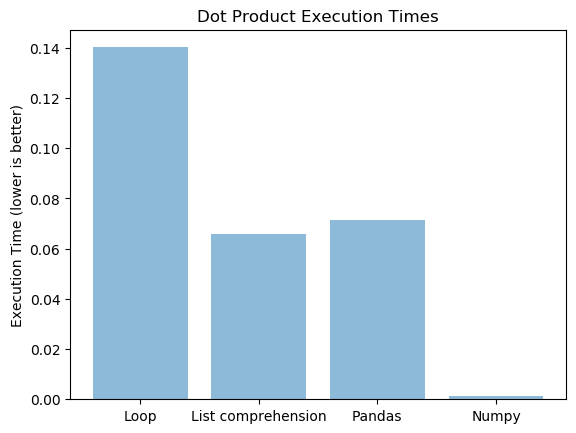

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt


objects = ('Loop', 'List comprehension', 'Pandas', 'Numpy')
y_pos = np.arange(len(objects))
performance = [timeloop,timelistcomp,timepandas,timenumpy]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Execution Time (lower is better)')
plt.title('Dot Product Execution Times')
plt.show()

# Element Wise

```
Let's say we have a account recordes like the following day by day:   

Revenue  |  Loss  | 
   $460  |  $110  |
   $730  |  $125  |
   $800  |  $140  |
   $650  |  $90   |

How much should we calculate the profits day by day?   

      Profits           Profits     
   $460 - $110            $350
   $730 - $125   ==>      $605
   $800 - $140            $660
   $650 - $90             $560

How can we calculate it in Python?
```

In [13]:
revenue =  [460, 730, 800, 650]
loss    =  [100, 125, 140, 90 ]

In [14]:
# With loop
profit = []
for r, l in zip(revenue,loss):
    profit.append(r-l)
profit

[360, 605, 660, 560]

In [15]:
# List Comprehesion
[r - l for r, l in zip(revenue,loss)]

[360, 605, 660, 560]

In [16]:
# Pandas
import pandas as pd
data = pd.DataFrame()
data['revenue'] = revenue
data['loss']    = loss

In [17]:
list(data['revenue'] - data['loss'])

[360, 605, 660, 560]

In [18]:
# ElementWise
revenue_array = np.array(revenue)
loss_array    = np.array(loss)
np.subtract(revenue_array, loss_array)

array([360, 605, 660, 560])

In [19]:
# Let's stress test it:
import random
random.seed(0)

revenue_list = [random.randint(100,1000) for i in range(1000000)]
loss_list    = [random.randint(100,500)  for i in range(1000000)]

In [20]:
# With loop
start_time = time.time()

totals = []
for r, l in zip(revenue_list,loss_list):
    totals.append(r-l)

timeloop = time.time()-start_time

print(timeloop)

0.15948009490966797


In [21]:
start_time = time.time()

# With list comprehesion
[r-l for r, l in zip(revenue_list,loss_list)]

timelistcomp = time.time()-start_time

print(timelistcomp)

0.0978250503540039


In [22]:
# pandas
import pandas as pd
data = pd.DataFrame()
data['revenue'] = revenue_list
data['loss']  = loss_list

In [23]:
start_time = time.time()

data['revenue'] - data['loss']

timepandas = time.time()-start_time
print(timepandas)

0.0030918121337890625


In [24]:
# Numpy
revenue_array = np.array(revenue_list)
loss_array  = np.array(loss_list)

In [25]:
start_time = time.time()
# Then the rest is easy!
revenue_array - loss_array

timenumpy = time.time()-start_time
print(timenumpy)

0.001814126968383789


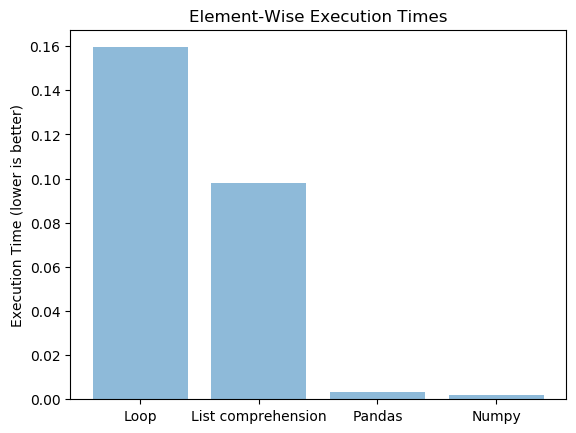

In [26]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Loop', 'List comprehension', 'Pandas', 'Numpy')
y_pos = np.arange(len(objects))
performance = [timeloop,timelistcomp,timepandas,timenumpy]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Execution Time (lower is better)')
plt.title('Element-Wise Execution Times')

plt.show()

# Real life example from Stack Overflow:

Challenge is to calculate haversine distance given lat,longs of two points on a map

link: https://stackoverflow.com/questions/29545704/fast-haversine-approximation-python-pandas

Haversine formula (from Wikipedia):

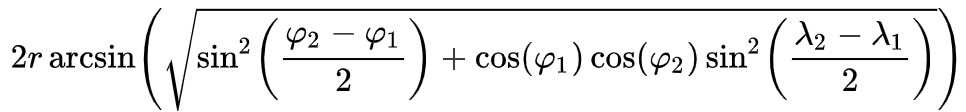

In [27]:
# Create data
import numpy as np
np.random.seed(0)
import pandas as pd
df = pd.DataFrame()
df['a_longitude'] = np.random.randint(-950000,-900000,1000000) / 10000
df['a_latitude' ] = np.random.randint( 300000, 350000,1000000) / 10000
df['b_longitude'] = np.random.randint(-950000,-900000,1000000) / 10000
df['b_latitude' ] = np.random.randint( 300000, 350000,1000000) / 10000


In [28]:
df.shape

(1000000, 4)

In [29]:
df.head()

,a_longitude,a_latitude,b_longitude,b_latitude
0,-94.7268,31.3549,-94.2321,31.6288
1,-90.6433,31.3535,-93.8075,33.5937
2,-90.7387,30.4422,-90.4240,34.1296
3,-90.4109,31.2681,-94.0681,31.9378
4,-92.8757,32.9306,-91.3825,30.7934


In [30]:
import time

# Pandas solution (from the Stackoverflow)
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

start_time = time.time()
for index, row in df.iterrows():
    df.loc[index, 'distance'] = haversine(row['a_longitude'], row['a_latitude'], row['b_longitude'], row['b_latitude'])

print("Execution Time:")
print(time.time()-start_time)

Execution Time:
205.17552995681763


In [31]:
df.head()

,a_longitude,a_latitude,b_longitude,b_latitude,distance
0,-94.7268,31.3549,-94.2321,31.6288,55.891332
1,-90.6433,31.3535,-93.8075,33.5937,387.217764
2,-90.7387,30.4422,-90.4240,34.1296,410.827081
3,-90.4109,31.2681,-94.0681,31.9378,354.026672
4,-92.8757,32.9306,-91.3825,30.7934,276.153091


In [32]:
# numpy solution (from the Stackoverflow)

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

start_time = time.time()
df['distance'] = haversine_np(df['a_longitude'].values, df['a_latitude'].values, df['b_longitude'].values, df['b_latitude'].values)
print("Execution Time:")
print(time.time()-start_time)

Execution Time:
0.09111285209655762


In [33]:
df.head()

,a_longitude,a_latitude,b_longitude,b_latitude,distance
0,-94.7268,31.3549,-94.2321,31.6288,55.891332
1,-90.6433,31.3535,-93.8075,33.5937,387.217764
2,-90.7387,30.4422,-90.4240,34.1296,410.827081
3,-90.4109,31.2681,-94.0681,31.9378,354.026672
4,-92.8757,32.9306,-91.3825,30.7934,276.153091


# Different Element-Wise operations

In [34]:
a = np.arange(1,6)
b = np.arange(6,11)

In [35]:
a,b

(array([1, 2, 3, 4, 5]), array([ 6,  7,  8,  9, 10]))

In [36]:
# Total
a + b

array([ 7,  9, 11, 13, 15])

In [37]:
# Subtract
a - b

array([-5, -5, -5, -5, -5])

In [38]:
# Multiply
a * b

array([ 6, 14, 24, 36, 50])

In [39]:
# Divide
a / b

array([0.16666667, 0.28571429, 0.375     , 0.44444444, 0.5       ])

In [40]:
# Add 3 to all
a + 3

array([4, 5, 6, 7, 8])

In [41]:
# Floor division
b // a, a // b

(array([6, 3, 2, 2, 2]), array([0, 0, 0, 0, 0]))

In [42]:
# Modulus, the rest after division
b % a

array([0, 1, 2, 1, 0])

In [43]:
a == b

array([False, False, False, False, False])

In [44]:
# Single array

In [45]:
a + 1

array([2, 3, 4, 5, 6])

In [46]:
# Or
a += 1
a

array([2, 3, 4, 5, 6])

In [47]:
a -= 1
a

array([1, 2, 3, 4, 5])

In [48]:
np.sin(a)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427])

In [49]:
np.cos(a)

array([ 0.54030231, -0.41614684, -0.9899925 , -0.65364362,  0.28366219])

In [50]:
np.log(a)

array([0.        , 0.69314718, 1.09861229, 1.38629436, 1.60943791])

In [51]:
np.exp(a)

array([  2.71828183,   7.3890561 ,  20.08553692,  54.59815003,
       148.4131591 ])